- 서울시 외식비 품목별 표준가격과 비교(boxplot이나 swarmplot) -> 확실히 표준 외식비에 비해 착한가격업소 가격이 싸구나 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
base_data = pd.read_csv('./datas/서울시 착한가격음식점(라벨링).csv', encoding='CP949', index_col=0)
base_data

,업소명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,기준년월,...,경도,행정구,행정동,검색명,식당아이디,별점,상품명,상품가격(일반)(원),메뉴라벨링,외식비
0,목우촌부추삼겹살,1,한식,서울특별시 관악구 남현1길 68-10 (남현동),588-7399,전철 2호선 4호선 사당역에서 5번출구로 나오시면 (구)관악등기소쪽 먹자골목으로 5...,영업시간 : 오전 10시 ~ 오후 11시 30분 좌석수 : 44석 휴무일 : 연중무...,▷사당역 먹자골목에 위치 ▷김치찌개된장찌개 2010년부터 가격 동결 ▷친절업소,257,02월 21일,...,126.981090,관악구,남현동,관악구 남현동 목우촌부추삼겹살,21025096,4.36,냉동삼겹살,8000.0,삼겹살,18056
1,목우촌부추삼겹살,1,한식,서울특별시 관악구 남현1길 68-10 (남현동),588-7399,전철 2호선 4호선 사당역에서 5번출구로 나오시면 (구)관악등기소쪽 먹자골목으로 5...,영업시간 : 오전 10시 ~ 오후 11시 30분 좌석수 : 44석 휴무일 : 연중무...,▷사당역 먹자골목에 위치 ▷김치찌개된장찌개 2010년부터 가격 동결 ▷친절업소,257,02월 21일,...,126.981090,관악구,남현동,관악구 남현동 목우촌부추삼겹살,21025096,4.36,생삼겹살,12000.0,삼겹살,18056
2,돌마리유황오리,1,한식,서울특별시 송파구 가락로 66 (석촌동),423-6231,전철노선 : 8호선 송파역 4번출구에서 강남한의원 방면 도보 7분 버스노선 : 21...,영업시간 :10:00~23:00 예약 :가능 카드 :가능 좌석 :96석 배달 : 불...,친절 서비스,155,02월 21일,...,127.103618,송파구,석촌동,송파구 석촌동 돌마리유황오리,19997949,4.41,삼겹살(국내산/200g),11000.0,삼겹살,18056
3,금강숯불생고기,1,한식,서울특별시 광진구 용마산로7길 9 (중곡동),3437-9599,구 중곡2동사무소 뒤,영업시간 : 11:00~23:00 좌석수 : 40 휴무일 : 무 배달 : 예약 : ...,타 업소에 비해 가격이 저렴함,65,02월 21일,...,127.087090,광진구,중곡동,광진구 중곡동 금강숯불생고기,18800486,4.33,삼겹살,8000.0,삼겹살,18056
4,자매식당,1,한식,서울특별시 광진구 구의로 16 (구의동),3437-8760,구의역 근처 서울광진 우체국 맞은편,영업시간 : 09:00 ~ 21:00 좌석수 : 30 휴무일 : 매주일요일 배달 :...,저렴한 가격,63,02월 21일,...,127.089551,광진구,구의동,광진구 구의동 자매식당,1492791228,4.59,삼겹살,12000.0,삼겹살,18056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,엄마가,1,한식,서울특별시 관악구 신림로 280 1층(신림동),NaN,서원역 1번출구에서 도보 3분,영업시간 : 월~목 11:00~21:00 금 11:00~18:00 일 11:00~2...,ㅇ 관악구 평균가보다 10%이상 저렴 ㅇ 친절하며 집밥 느낌의 메뉴로 구성,0,02월 21일,...,126.931471,관악구,신림동,관악구 신림동 엄마가,1464889020,4.79,김밥,2000.0,김밥,2969
583,먹깨비 김밥,1,한식,서울특별시 서울 강서구 강서로 39,02-2698-0123,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,속 꽉차고 담백한 만두 8가지 이상의 재료가 들어간 신선한 김밥 학교 앞에서 먹던 ...,0,02월 21일,...,126.846695,강서구,화곡동,강서구 화곡동 먹깨비 김밥,1012261354,4.32,야채김밥,2000.0,김밥,2969
584,냠냠분식,1,한식,서울특별시 마포구 모래내로7길 89 1층 2호(성산동),NaN,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,NaN,0,02월 21일,...,126.908297,마포구,성산동,마포구 성산동 냠냠분식,1027469694,4.24,김밥,2500.0,김밥,2969
585,멸치국수,1,한식,서울특별시 도봉구 해등로16길 12(창동),02-994-8233,창동역 2번출구에서 690m,영업시간 : 10:00-21:00 좌석수 : 휴무일 : 배달 : 불가능 예약 : 카...,도봉구보건소 사거리에 위치하며 가격이 저렴하고 맛이 좋음,0,02월 21일,...,127.040573,도봉구,창동,도봉구 창동 멸치국수,20846748,4.61,김밥,2500.0,김밥,2969


In [24]:
res_data = base_data[['업소명','행정구', '행정동','별점',
       '상품명', '상품가격(일반)(원)', '메뉴라벨링']]
# res_data = base_data[['상품가격(일반)(원)', '메뉴라벨링']]

In [35]:
naeng_table = res_data[res_data['메뉴라벨링']=='냉면']
naeng_table[['상품가격(일반)(원)']]
# bi_table = res_data[res_data['메뉴라벨링']=='비빔밥']
# kimchi_table = res_data[res_data['메뉴라벨링']=='김치찌개백반']
# samgyeop_table = res_data[res_data['메뉴라벨링']=='삼겹살']
# ja_table = res_data[res_data['메뉴라벨링']=='자장면']
# samgye_table = res_data[res_data['메뉴라벨링']=='삼계탕']
# kal_table = res_data[res_data['메뉴라벨링']=='칼국수']
# kimbab_table = res_data[res_data['메뉴라벨링']=='김밥']

,상품가격(일반)(원)
103,5000.0
104,6000.0
105,3500.0
106,5000.0
107,4000.0
...,...
184,6000.0
185,5500.0
186,5500.0
187,4000.0


In [22]:
naeng_table

,상품가격(일반)(원),메뉴라벨링
103,5000.0,냉면
104,6000.0,냉면
105,3500.0,냉면
106,5000.0,냉면
107,4000.0,냉면
...,...,...
184,6000.0,냉면
185,5500.0,냉면
186,5500.0,냉면
187,4000.0,냉면


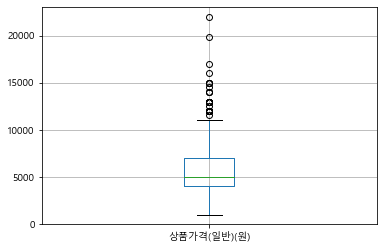